### ANN 과 손실함수, 역전파법
1. **인공신경망과 손실함수**
    1. 인공신경먕(ANN)
    1. 손실함수(Loss Function)
1. 학습 알고리즘
    1. GD, SGD , Momentum, AdaGrad,RMSProp, Adam
1. **역전파법(Back propagation)**
    1. 역전파법
    1. 역전파법 구현

#### 인공신경망(ANN)
인공신경망이란? 뇌의 학습방법을 수학적으로 모델링한 기계학습 알고리즘
즉, 사람의 뇌를 모델링하여 기계에 적용한 것.
![Nueron](https://user-images.githubusercontent.com/50629716/62411591-324b6c80-b630-11e9-9c22-38900304c115.PNG)

* Dendrite : 기계학습 에서는 벡터의 형태로 입력된 데이터

* Soma : dendrite를 통해 전달받은 입력을 합산하는 기능 

* Axon : soma에서 계산된 값을 출력한다. 
$$ f\left( \sum _{i}w_{i}x_{i}+b\right) $$
* X : 입력
* w : 가중치
* b : 편향
* f : 활성화 함수
* u : 선형결합
* z : 출력
![1layers](https://user-images.githubusercontent.com/50629716/62411650-53608d00-b631-11e9-9b08-ccb586ff6931.PNG)

#### 손실함수(Loss function)

신경망에서 내놓는 결과값(예측값)과 실제 결과값 사이의 차이를 정의하는 함수

**회귀**
평균제곱오차(MSE)

$$ \operatorname {MSE}={\frac  {1}{n}}\sum _{{i=1}}^{n}({\hat  {Y_{i}}}-Y_{i})^{2} $$
**분류**
활성화 함수로 소프트 맥스 함수
교차엔트로피 오차(Cross entropy Error)

In [5]:
import numpy as np
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)
    
t = [0,0,1,0,0,0,0,0,0,0]
y1 = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y1),np.array(t)))    

y2 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y2),np.array(t)))

0.09750000000000003
0.5975


#### 역전파법(Back Propagation)
1. 계산 그래프는 계산 과정을 그래프로 그려낸 것, 노드와 엣지로 표현
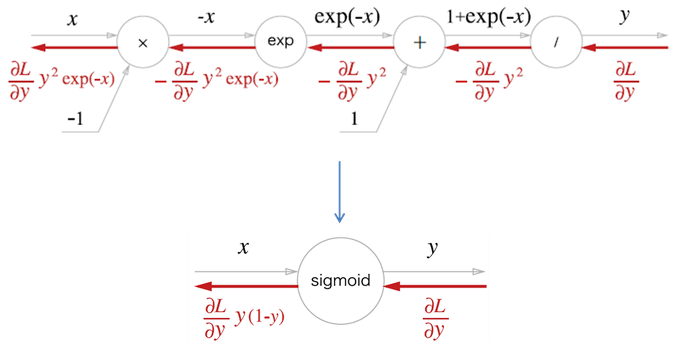

1. 계산 그래프에서 '사과 가격이 오르면 최종 금액에 어떤 영향을 주는가?'에 대해 사과 가격에 대한 지불 금액의 미분을 구해 계산할 수 있다.
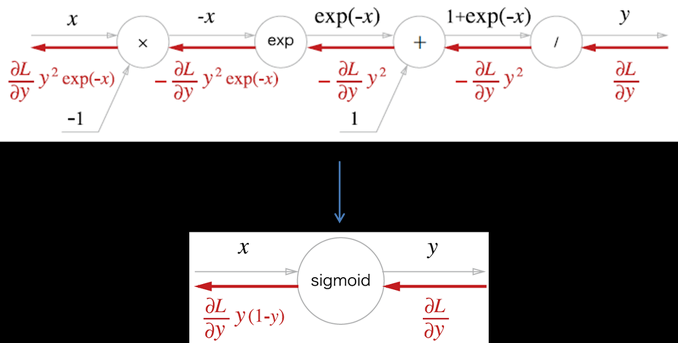


https://ratsgo.github.io/deep%20learning/2017/05/14/backprop/
https://excelsior-cjh.tistory.com/171

1. Sigmoid


Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5025 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3776 - acc: 0.8628
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3383 - acc: 0.87681s - lo
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3131 - acc: 0.8852
Epoch 5/5
10000/10000 [==============================] - 0s 24us/sample - loss: 0.3535 - acc: 0.8738
[[6.4792002e-05 1.1386417e-07 1.1424492e-06 ... 4.3591842e-02
  9.1733218e-06 9.4997609e-01]
 [9.5488474e-05 9.9549085e-14 9.9940133e-01 ... 1.3710575e-15
  3.4259384e-10 1.0571065e-13]
 [5.6697935e-08 9.9999976e-01 5.1640576e-09 ... 1.9167245e-18
  6.0327359e-08 9.4940921e-14]
 ...
 [7.3524585e-05 1.0015852e-08 1.6973578e-06 ... 1.4146313e-09
  9.9983335e-01 3.7483405e-11]
 [3.8006363e-09 9.9995470e-01 4.5665347e-09 ... 1.1341324e-12
  4.0755401e-07 5.1914761e-09]
 [2.2892827e-04 1.

TypeError: Invalid shape (10,) for image data

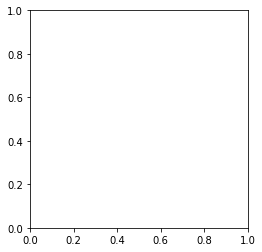

In [58]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
fashion_mnist = keras.datasets.fashion_mnist
(traing_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

traing_images = traing_images/255.0 # 데이터 크기를 정규화 하여 대략적으로 동일하게 맞추는 작업
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #2차원인 것을 1차원으로 펴주는
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.fit(traing_images, train_labels, epochs = 5)
test_loss, test_acc = model.evaluate(test_images,test_labels)

predictions = model.predict(test_images)
print(predictions)